# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


## Continuous Features

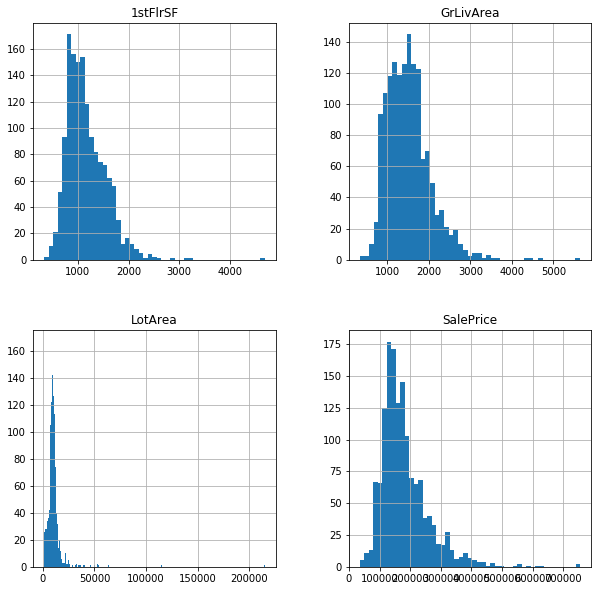

In [11]:
ames[continuous].hist(bins='auto', figsize=(10,10));

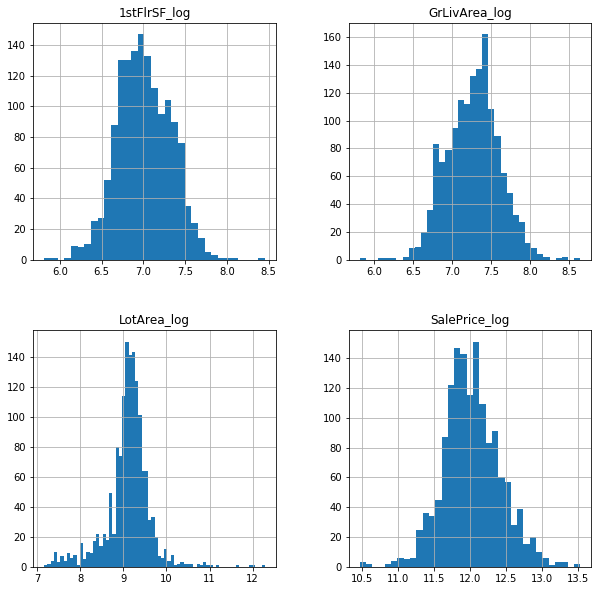

In [25]:
ames_log = np.log(ames[continuous])
ames_log.columns = [f'{col}_log' for col in ames[continuous].columns]
ames_log.hist(bins='auto', figsize=(10,10));

In [36]:
def normalize(val):
    return (val - np.mean(val)) / np.std(val)

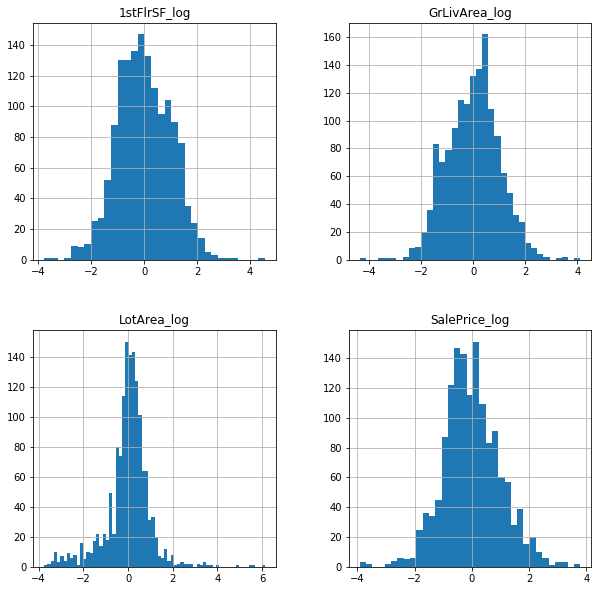

In [37]:
ames_log_norm = ames_log.apply(normalize)
ames_log_norm.hist(bins='auto', figsize=(10,10));

## Categorical Features

In [32]:
ames_cat = pd.get_dummies(ames[categoricals], drop_first=1, prefix=categoricals)
ames_cat

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combine Categorical and Continuous Features

In [38]:
ames_big = pd.concat([ames_log_norm, ames_cat], axis=1)
ames_big.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,SalePrice_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133231,-0.803570,0.529260,0.560068,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.113442,0.418585,-0.381846,0.212764,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.420061,-0.576560,0.659675,0.734046,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.103347,-0.439287,0.541511,-0.437382,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.878409,0.112267,1.282191,1.014651,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Run a linear model with SalePrice as the target variable in statsmodels

In [39]:
import statsmodels.api as sm

In [42]:
x = ames_big.drop('SalePrice_log', axis=1)
y = ames_big['SalePrice_log']

In [44]:
x_int

,const,LotArea_log,1stFlrSF_log,GrLivArea_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1.0,-0.133231,-0.803570,0.529260,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.113442,0.418585,-0.381846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0.420061,-0.576560,0.659675,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.103347,-0.439287,0.541511,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.878409,0.112267,1.282191,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,-0.259188,-0.465607,0.416680,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1456,1.0,0.725419,1.981135,1.106592,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,1.0,-0.002325,0.228338,1.469942,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1458,1.0,0.136861,-0.077573,-0.854471,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
x_int = sm.add_constant(x)
model = sm.OLS(y,x_int).fit()
model.summary()

C:\Users\Steven\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Thu, 09 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:45:57   Log-Likelihood:                -738.64
No. Observations:                1460   AIC:                             1573.
Df Residuals:                    1412   BIC:                             1827.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1317      0.263     -0.500      0.617      -0.648       0.385
LotArea_log              0.1033      0.019      5.475      0.000       0.066       0.140
1stFlrSF_log             0.1371      0.016      8.584      0.000       0.106       0.168
GrLivArea_log            0.3768      0.016     24.114      0.000       0.346       0.407
BldgType_2fmCon         -0.1715      0.079     -2.173      0.030      -0.326      -0.017
BldgType_Duplex         -0.4205      0.062     -6.813      0.000      -0.542      -0.299
BldgType_Twnhs          -0.1404      0.093     -1.513      0.130      -0.322       0.042
BldgType_TwnhsE         -0.0512      0.060     -0.858      0.391      -0.168       0.066
KitchenQual_Fa          -1.0002      0.088    -11.315      0.000      -1.174      -0.827
KitchenQual_Gd          -0.3822      0.050     -7.613      0.000      -0.481      -0.284
KitchenQual_TA          -0.6695      0.055    -12.111      0.000      -0.778      -0.561
SaleType_CWD             0.2286      0.215      1.061      0.289      -0.194       0.651
SaleType_Con             0.5863      0.304      1.927      0.054      -0.010       1.183
SaleType_ConLD           0.3152      0.155      2.029      0.043       0.010       0.620
SaleType_ConLI           0.0331      0.195      0.169      0.865      -0.350       0.416
SaleType_ConLw           0.0161      0.196      0.082      0.935      -0.368       0.400
SaleType_New             0.3000      0.079      3.803      0.000       0.145       0.455
SaleType_Oth             0.1179      0.246      0.480      0.631      -0.364       0.599
SaleType_WD              0.1749      0.065      2.676      0.008       0.047       0.303
MSZoning_FV              1.0670      0.193      5.526      0.000       0.688       1.446
MSZoning_RH              0.8771      0.194      4.512      0.000       0.496       1.258
MSZoning_RL              0.9964      0.162      6.151      0.000       0.679       1.314
MSZoning_RM              1.1027      0.152      7.264      0.000       0.805       1.400
Street_Pave             -0.2132      0.180     -1.182      0.237      -0.567       0.141
Neighborhood_Blueste     0.0530      0.318      0.167      0.868      -0.571       0.677
Neighborhood_BrDale     -0.4629      0.171     -2.711      0.007      -0.798      -0.128
Neighborhood_BrkSide    -0.6500      0.137     -4.735      0.000      -0.919      -0.381
Neighborhood_ClearCr    -0.2103      0.144     -1.456      0.146      -0.494       0.073
Neighborhood_CollgCr    -0.0761      0.119     -0.641      0.522      -0.309       0.157
Neighborhood_Crawfor    -0.0824      0.129     -0.638      0.523      -0.336       0.171
Neighborhood_Edwards    -0.7615      0.124     -6.143      0.000      -1.005      -0.518
Neighborhood_Gilbert    -0.0980      0.126     -0.777    

## Run the same model in scikit-learn

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [52]:
linreg.fit(x, y)
print(linreg.coef_, '\n\n', linreg.intercept_)

[ 0.10327192  0.1371289   0.37682133 -0.17152105 -0.42048287 -0.14038921
 -0.05121949 -1.00020261 -0.38215288 -0.6694784   0.22855565  0.58627941
  0.31521364  0.03310544  0.01609215  0.29995612  0.1178827   0.17486316
  1.06700108  0.8771105   0.99643261  1.10266268 -0.21318409  0.0529509
 -0.46287108 -0.65004527 -0.21026441 -0.0761186  -0.08236455 -0.76152767
 -0.09803299 -0.96216285 -0.6920628  -0.25540919 -0.4408245  -0.01595592
 -0.26772132  0.36325607  0.36272091 -0.93537011 -0.70000301 -0.47559431
 -0.23317719  0.09506225  0.42971796  0.00569435  0.12766986] 

 -0.1317424941874429


## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!